![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

# Aprendizaje automático: Árbol de decisión ID3

## Introducción a Data Science
   
<center>
    <img src='images/tree.webp'style="width: 300px;">
</center>

**Profesor**: Juan Bekios Calfa

**Carreras**: ICCI, IECI e IenCI

<sub><sup>Inteligencia Artificial: Un Enfoque Moderno [Link](https://amzn.to/2VCZn20).</sup></sub> 

## Introducción

   
Los árboles de decisión es una técnica de **aprendizaje automático supervisado** muy utilizada en muchas aplicaciones de negocios, ciencia, etc. Como su nombre indica, esta técnica de **machine learning** toma una serie de decisiones en forma de árbol. 

Los **nodos intermedios** y las ramas representan soluciones intemedias. Los **nodos finales** (las hojas) nos dan la predicción que vamos buscando.

Los **árboles de decisión** pueden usarse para resolver problemas de **clasificación** y de **regresión**.

## Introducción
### Tipos de técnicas y algoritmos

   
* **Motivación:** Clasificación **simbólica** simple mediante análisis estadístico y teoría de la información.
* **Descripción:** Cada **nodo interno** es una pregunta sobre alguna característica y cada **nodo hoja** es una clase.
* **Desventajas:**
  * Requiere de muchos ejemplos.
  * No se garantiza solución óptima



## Características (Atributos de entrada)
### Ejemplo: Ir a comer a un restaurante

- Existen alternativas (Sí/No).
- Tiene bar (Sí/No).
- Viernes/Sábado (Sí/No).
- Tenemos Hambre (Sí/No).
- Clientes (Muchos/Algunos/Ninguno).
- Precio ($, $$, $$$).
- Lloviendo (Sí/No).
- Tipo (pizza, frances, etc.).
- Espera Estimada (<10, 10-30, 30-60, >60)


## Construir un árbol de decisión para ir al mejor


<center>
    <img src='images/arbol-ir-a-comer.png'style="width: 800px;">
</center>


## Introducción

### Ejemplo

<center>
    <img src='images/tabla-ir-a-comer.png'style="width: 800px;">
</center>


## Concepto de entropía

### Ejemplo

<center>
    <img src='images/arbol-sin-entropia.png'style="width: 700px;">
</center>


Hay **entropia**, entonces tenemos una **baja ganancia de información**.

## Concepto de entropía

### Ejemplo

<center>
    <img src='images/arbol-con-entropia.png'style="width: 500px;">
</center>


No hay **entropia**, entonces tenemos una **alta ganancia de información**.

## Nomenclarura

- E: conjunto de ejemplos. $E_x$ : ejemplo x.
- A: conjunto de atributos. $A_y$ : atributo y.
- $V_y$ : conjunto de valores del atributo y.
- C: conjunto de clases (etiquetas).
- $A_{yx}$ : atributo y en el ejemplo x.
- $V_{yx}$ : valor del atributo y en el ejemplo x.
- $C_x$ : clase del ejemplo x.
- $n_z$ : número de ejemplos que cumplen z.



## Ganancia y entropía

$Ganancia(A+B)=Entropía(A)-Entropía(A+B)$

$Entropía(Z)=P(Z)\cdot Información(Z)$

$Información(Z)=-\log_2(P(Z))  :\log_2\equiv bits$

$Entropía(Z)=-\sum_{i=1}^N P(Z)\cdot \log_2(P(Z))$

$Entropía(Z=z)=-\sum_{i=1}^N\frac{cant(Z=z)}{cant(Z)}\cdot \log_2 \left({\frac{cant(Z=z)}{cant(Z)}}{}\right)$

## Ganacia de atributos

Hay que **elegir el atributo** que aporte la **máxima ganancia de información**:

* Ganancia(E, $A_y$) = Entropía(E) – Entropía(E, $A_y$)
* Pero Entropía(E) es constante, luego maximizar Ganancia(E, $A_y$) es lo mismo que minimizar Entropía(E, $A_y$)

## Entropía de atributos

$Entropía(E, $A_y$, $V_y$)=-\sum_{k=1}^C\frac{n_{yvk}}{n_{yv}}\cdot \log_2 \left({\frac{n_{yvk}}{n_{yv}}}\right)$

$Entropía(E, $A_y$)=\sum_{v=1}^{V_y}\frac{n_{yv}}{N}\cdot Entropía(E, A_y, V_y=v)$

$Entropía(E)= -\sum_{k=1}^C\frac{n_{k}}{N}\cdot \log_2 \left({\frac{n_k}{N}}\right)$

## Entropía de atributos

<center>
    <img src='images/entropia-E.png'style="width: 900px;">
</center>

## Entropía de atributos

<center>
    <img src='images/entropia_E_A.png'style="width: 900px;">
</center>

## Entropía de atributos

<center>
    <img src='images/entropia_E_A_V.png'style="width: 900px;">
</center>

## Introducción

### Ejemplo

<center>
    <img src='images/tabla-ir-a-comer.png'style="width: 300px;">
</center>

$Ganancia(E, A_y=Clientes)=1-\left[{\frac{2}{12}\cdot Entropía(E, A_y=Clientes, V_y=None) + 
\frac{4}{12}\cdot  Entropía(E, A_y=Clientes, V_y=Some) +\frac{6}{12}\cdot  Entropía(E, A_y=Clientes, V_y=Full)}\right]$

$=0,541$

$Ganancia(E, A_y=Tipo)=0$

## Algoritmo ID3 (Pseudocódigo)

```
FUNCIÓN ID3(ejemplos, atributos, nodo) RETORNA nodo
  (mayor, porcentaje) = CLASE-MINORITARIA(ejemplos)
  SI atributos.VACIO() o porcentaje > umbral ENTONCES 
    nodo.clase = mayor
  EN CASO CONTRARIO
    atributo = MÁXIMA-GANANCIA(ejemplos, atributos)
    nodo.pregunta = atributo
    POR CADA valor EN atributo.VALORES HACER
      nuevo = CREAR-NODO(atributo, valor)
      nodo.HIJOS.AGREGAR(nuevo)
      atributos2 = atributos.QUITAR(atributos)
      ejemplos 2 = ejemplos.QUITAR(atributos, valor)
      ID3(ejemplos2, atributos2, nuevo)
  RETORNA nodo
```

## Análisis

* **Complejidad Espacio:** Lineal/polinómico
* **Complejidad tiempo:** Polinómico/exponencial
* **Hiperparámetros:** Umbral
* **Limitaciones:**
  * Sólo clasificación (clases discretas)
  * Sólo regresión lineal
  * Pocos atributos y valores
  * No tiene en cuenta costos de atributos
  * No garantiza el óptimo

## Algoritmo ID3: Implementación en Python

Se adaptará el ejercicio: https://scikit-learn.org/stable/modules/tree.html#classification






In [17]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()

X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

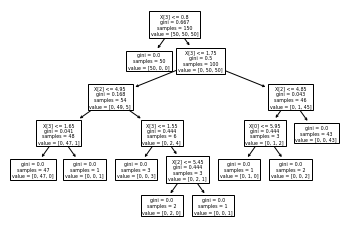

In [18]:
tree.plot_tree(clf) 

[Text(334.8, 597.96, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(283.2923076923077, 489.24, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(386.3076923076923, 489.24, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(206.03076923076924, 380.52000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(103.01538461538462, 271.8, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(51.50769230769231, 163.07999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(154.52307692307693, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(309.04615384615386, 271.8, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(257.53846153846155, 163.07999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(360.55384615384617, 163.07999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(309.04615384615386, 54.360000000

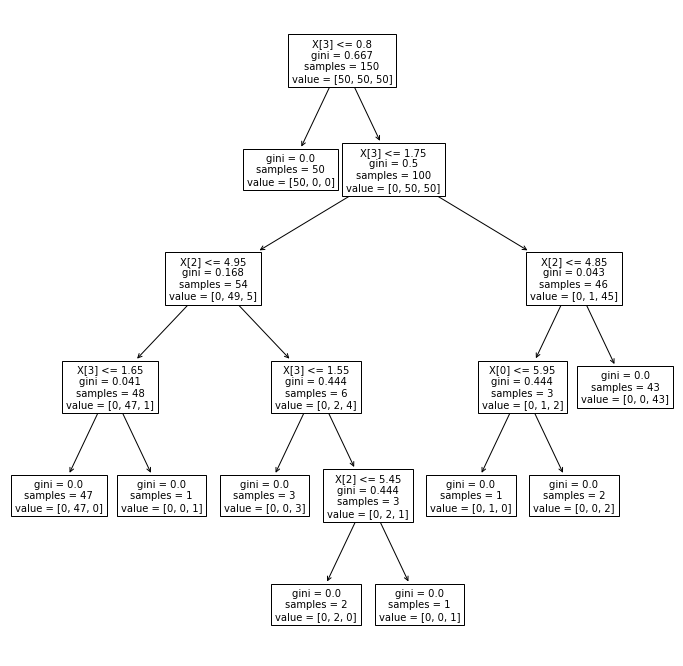

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))  
tree.plot_tree(clf, fontsize=10)

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r) 

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [24]:
!pip install graphviz


In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")


In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 